##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

In [1]:
# 1. Imports
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model, metrics

# 2. Data read
# Read data from .csv
data = pd.read_csv('C:/Users/Dell/Documents/Studia_sem7/Analiza-i-Bazy-Danych/Lab_7/SCORES.csv')
df = pd.DataFrame(data)

# Show original data
data.shape

(25, 2)

In [2]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0, 0.5, 'Scores')

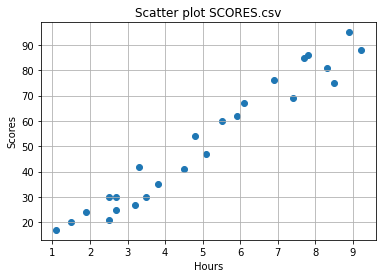

In [4]:
# 3. Basic scatter plot
# Data division x, y
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

# Plotting
plt.scatter(x, y)
plt.grid(True)
plt.title("Scatter plot SCORES.csv")
plt.xlabel("Hours")
plt.ylabel("Scores")

regr.coef_: [[10.07430792]]

regr.intercept_: [1.14575036]



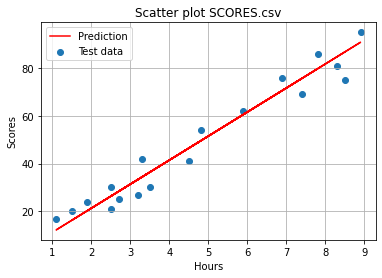

Mean Absolute Error: 5.245070422535209

Mean Squared Error: 32.1542965937995

Root Mean Squared Error: 5.67047587013643



In [5]:
# 4. Training and test data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.3)

# 5. Linear regression model
# Create linear regression object and train the model
Y_train = np.array(Y_train).reshape(-1, 1)
X_train = np.array(X_train).reshape(-1, 1)
regr = linear_model.LinearRegression()
regr = regr.fit(X_train, Y_train)

# Predict values
Y_test = np.array(Y_test).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
Y_predicted = regr.predict(X_test)

# 6. The coefficients
print("regr.coef_: {}\n".format(regr.coef_))
print("regr.intercept_: {}\n".format(regr.intercept_))

# 7. Comparison between test data and predicted outcome
# 8. Plotting comparison
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_predicted, 'r')

plt.grid(True)
plt.title("Scatter plot SCORES.csv")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.legend(['Prediction', 'Test data'])
plt.show()

# 9. Errors
# Mean Absolute Error
error_1 = np.mean(np.abs(Y_predicted - Y_test))
print("Mean Absolute Error: {}\n".format(error_1))

# Mean Squared Error
error_2 = np.mean((Y_predicted - Y_test) ** 2)
print("Mean Squared Error: {}\n".format(error_2))

# Root Mean Squared Error
error_3 = np.sqrt(np.mean((Y_predicted - Y_test) ** 2))
print("Root Mean Squared Error: {}\n".format(error_3))

# SBP.csv

In [6]:
# 2. Data read
# Read data from .csv
data2 = pd.read_csv('C:/Users/Dell/Documents/Studia_sem7/Analiza-i-Bazy-Danych/Lab_7/SBP.csv')
df2 = pd.DataFrame(data)

# Show original data
data2.shape

(19, 2)

In [7]:
data2.head()

,Age,SBP
0,60,117
1,61,120
2,74,145
3,57,129
4,63,132


In [8]:
data2.describe()

,Age,SBP
count,19.000000,19.000000
mean,64.947368,129.421053
std,7.214751,13.454928
min,54.000000,111.000000
25%,60.500000,119.000000
50%,63.000000,129.000000
75%,68.500000,137.000000
max,79.000000,163.000000


Text(0, 0.5, 'SBP')

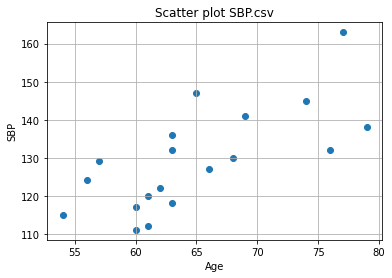

In [9]:
# 3. Basic scatter plot
# Data division x, y
x2 = data2.iloc[:, :-1].values
y2 = data2.iloc[:, 1].values

# Plotting
plt.scatter(x2, y2)
plt.grid(True)
plt.title("Scatter plot SBP.csv")
plt.xlabel("Age")
plt.ylabel("SBP")

regr.coef_: [0.74053296]

regr.intercept_: 81.96914446002803



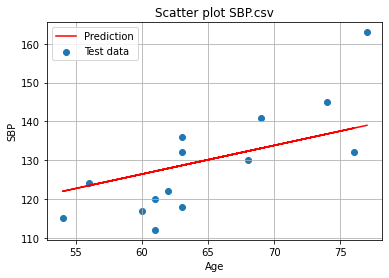

Mean Absolute Error: 8.229513123622525

Mean Squared Error: 98.73548783321907

Root Mean Squared Error: 9.936573243992068



In [10]:
# 4. Training and test data
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(x2, y2, train_size=0.3)

# 5. Linear regression model
# Create linear regression object and train the model
#Y_train2 = np.array(Y_train2).reshape(-1, 1)
#X_train2 = np.array(X_train2).reshape(-1, 1)
regr2 = linear_model.LinearRegression().fit(X_train2, Y_train2)

# Predict values
#Y_test2= np.array(Y_test2).reshape(-1, 1)
#X_test2 = np.array(X_test2).reshape(-1, 1)
Y_predicted2 = regr2.predict(X_test2)

# 6. The coefficients
print("regr.coef_: {}\n".format(regr2.coef_))
print("regr.intercept_: {}\n".format(regr2.intercept_))

# 7. Comparison between test data and predicted outcome
# 8. Plotting comparison
plt.scatter(X_test2, Y_test2)
plt.plot(X_test2, Y_predicted2, 'r')

plt.grid(True)
plt.title("Scatter plot SBP.csv")
plt.xlabel("Age")
plt.ylabel("SBP")
plt.legend(['Prediction', 'Test data'])
plt.show()

# 9. Errors
# Mean Absolute Error
error2_1 = np.mean(np.abs(Y_predicted2 - Y_test2))
print("Mean Absolute Error: {}\n".format(error2_1))

# Mean Squared Error
error2_2 = np.mean((Y_predicted2 - Y_test2) ** 2)
print("Mean Squared Error: {}\n".format(error2_2))

# Root Mean Squared Error
error2_3 = np.sqrt(np.mean((Y_predicted2 - Y_test2) ** 2))
print("Root Mean Squared Error: {}\n".format(error2_3))

In [11]:
# 2. Data read
# Read data from .csv
data3 = pd.read_csv('C:/Users/Dell/Documents/Studia_sem7/Analiza-i-Bazy-Danych/Lab_7/PETROL.csv')
df3 = pd.DataFrame(data3)

# Show original data
data3.shape

(48, 5)

In [12]:
data3.head()

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [13]:
data3.describe()

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


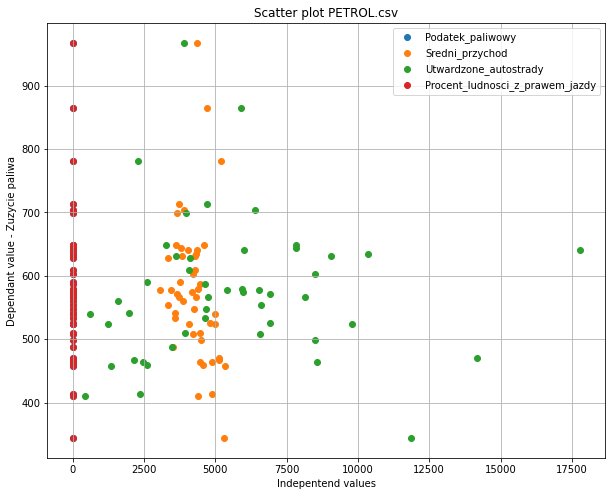

In [14]:
# 3. Basic scatter plot
# Data division x, y
x3 = df3[['Podatek_paliwowy', 'Sredni_przychod', 'Utwardzone_autostrady', 'Procent_ludnosci_z_prawem_jazdy']]
y3 = df3['Zuzycie_paliwa']

# Plotting
fig = plt.figure(figsize=(10, 8))
plt.scatter(x3['Podatek_paliwowy'], y3)
plt.scatter(x3['Sredni_przychod'], y3)
plt.scatter(x3['Utwardzone_autostrady'], y3)
plt.scatter(x3['Procent_ludnosci_z_prawem_jazdy'], y3)

plt.grid(True)
plt.title("Scatter plot PETROL.csv")
plt.xlabel("Indepentend values")
plt.ylabel("Dependant value - Zuzycie paliwa")
plt.legend(['Podatek_paliwowy', 'Sredni_przychod', 'Utwardzone_autostrady', 'Procent_ludnosci_z_prawem_jazdy'])

regr.coef_: [-6.13604766e+01 -4.95693885e-02 -2.16553505e-02  1.36946120e+03]

regr.intercept_: 588.8760645191692



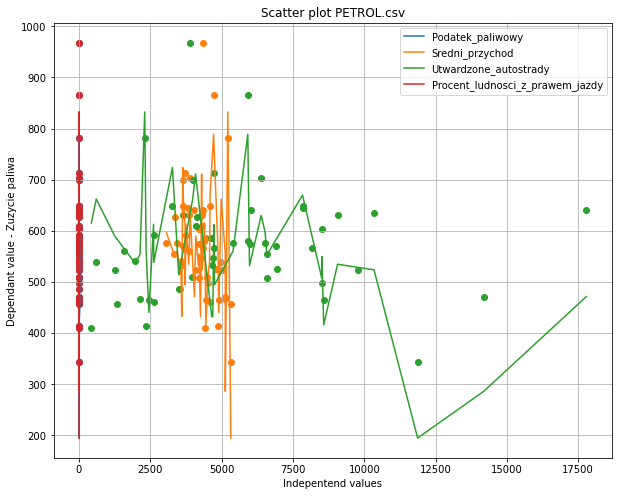

    Actual   Predicted
23     547  432.099786
4      410  615.589947
41     699  662.837127
1      524  590.056455
28     574  532.011588
7      467  554.912469
22     464  440.651199
9      498  507.416162
24     460  538.439388
29     534  432.579398
37     704  630.415670
16     603  549.951963
38     648  724.180443
18     865  788.982001
17     714  612.241258
20     649  669.985285
34     487  514.353603
3      414  560.802813
27     631  534.727525
25     566  494.394679
46     610  711.158166
44     782  832.636152
15     635  523.900047
36     640  471.605100
32     577  596.430281
0      541  535.795645
21     540  662.367109
31     554  553.876170
11     471  286.344131
26     577  560.624499
13     508  554.678457
6      344  194.953975
8      464  416.264214
43     591  612.859537 

Mean Absolute Error: 75.10618506024132

Mean Squared Error: 8394.04306464402

Root Mean Squared Error: 91.61901038891449



In [15]:
# 4. Training and test data
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(x3, y3, train_size=0.3)

# 5. Linear regression model
# Create linear regression object and train the model
#Y_train3 = np.array(Y_train3).reshape(-1, 1)
#X_train3 = np.array(X_train3).reshape(-1, 1)
regr3 = linear_model.LinearRegression().fit(X_train3, Y_train3)

# Predict values
#Y_test3 = np.array(Y_test3).reshape(-1, 1)
#X_test3 = np.array(X_test3).reshape(-1, 1)
Y_predicted3 = regr3.predict(X_test3)

# 6. The coefficients
print("regr.coef_: {}\n".format(regr3.coef_))
print("regr.intercept_: {}\n".format(regr3.intercept_))

# 7. Comparison between test data and predicted outcome
# 8. Plotting comparison
fig = plt.figure(figsize=(10, 8))
plt.scatter(x3['Podatek_paliwowy'], y3)
plt.scatter(x3['Sredni_przychod'], y3)
plt.scatter(x3['Utwardzone_autostrady'], y3)
plt.scatter(x3['Procent_ludnosci_z_prawem_jazdy'], y3)

df_plot1 = pd.DataFrame({'Test_data': X_test3['Podatek_paliwowy'], 'Predicted': Y_predicted3})
df_plot2 = pd.DataFrame({'Test_data': X_test3['Sredni_przychod'], 'Predicted': Y_predicted3})
df_plot3 = pd.DataFrame({'Test_data': X_test3['Utwardzone_autostrady'], 'Predicted': Y_predicted3})
df_plot4 = pd.DataFrame({'Test_data': X_test3['Procent_ludnosci_z_prawem_jazdy'], 'Predicted': Y_predicted3})

df_plot1 = df_plot1.sort_values("Test_data")
df_plot2 = df_plot2.sort_values("Test_data")
df_plot3 = df_plot3.sort_values("Test_data")
df_plot4 = df_plot4.sort_values("Test_data")

plt.plot(df_plot1[['Test_data']], df_plot1[['Predicted']], label='Podatek_paliwowy')
plt.plot(df_plot2[['Test_data']], df_plot2[['Predicted']], label='Sredni_przychod')
plt.plot(df_plot3[['Test_data']], df_plot3[['Predicted']], label='Utwardzone_autostrady')
plt.plot(df_plot4[['Test_data']], df_plot4[['Predicted']], label='Procent_ludnosci_z_prawem_jazdy')

plt.grid(True)
plt.title("Scatter plot PETROL.csv")
plt.xlabel("Indepentend values")
plt.ylabel("Dependant value - Zuzycie paliwa")
plt.legend()
plt.show()

df = pd.DataFrame({'Actual': Y_test3, 'Predicted': Y_predicted3})
print(df,'\n')

# 9. Errors
# Mean Absolute Error
error3_1 = np.mean(np.abs(Y_predicted3 - Y_test3))
print("Mean Absolute Error: {}\n".format(error3_1))

# Mean Squared Error
error3_2 = np.mean((Y_predicted3 - Y_test3) ** 2)
print("Mean Squared Error: {}\n".format(error3_2))

# Root Mean Squared Error
error3_3 = np.sqrt(np.mean((Y_predicted3 - Y_test3) ** 2))
print("Root Mean Squared Error: {}\n".format(error3_3))

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [16]:
# 2. Data read
# Read data from .csv
data4 = pd.read_csv('C:/Users/Dell/Documents/Studia_sem7/Analiza-i-Bazy-Danych/Lab_7/HEART.csv', na_values='?')
df4 = pd.DataFrame(data4)

# Show original data
data4.shape

(294, 14)

In [17]:
data4.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0


In [18]:
data4.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,294.000000,294.000000,294.000000,293.000000,271.000000,286.000000,293.000000,293.000000,293.000000,294.000000,104.000000,3.0,28.000000,294.000000
mean,47.826531,0.724490,2.982993,132.583618,250.848708,0.069930,0.218430,139.129693,0.303754,0.586054,1.894231,0.0,5.642857,0.360544
std,7.811812,0.447533,0.965117,17.626568,67.657711,0.255476,0.460868,23.589749,0.460665,0.908648,0.338995,0.0,1.615074,0.480977
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,1.000000,0.0,3.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,209.000000,0.000000,0.000000,122.000000,0.000000,0.000000,2.000000,0.0,5.250000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,243.000000,0.000000,0.000000,140.000000,0.000000,0.000000,2.000000,0.0,6.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,282.500000,0.000000,0.000000,155.000000,1.000000,1.000000,2.000000,0.0,7.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,3.000000,0.0,7.000000,1.000000


In [19]:
df4 = df4.drop(['slope', 'ca', 'thal'], axis=1)
df4 = pd.DataFrame(df4)
df4 = df4.dropna().copy()
df4

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0
5,32,0,2,105.0,198.0,0.0,0.0,165.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160.0,331.0,0.0,0.0,94.0,1.0,2.5,1
290,54,0,3,130.0,294.0,0.0,1.0,100.0,1.0,0.0,1
291,56,1,4,155.0,342.0,1.0,0.0,150.0,1.0,3.0,1
292,58,0,2,180.0,393.0,0.0,0.0,110.0,1.0,1.0,1


In [20]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 293
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         261 non-null    int64  
 1   sex         261 non-null    int64  
 2   cp          261 non-null    int64  
 3   trestbps    261 non-null    float64
 4   chol        261 non-null    float64
 5   fbs         261 non-null    float64
 6   restecg     261 non-null    float64
 7   thalach     261 non-null    float64
 8   exang       261 non-null    float64
 9   oldpeak     261 non-null    float64
 10  num         261 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 24.5 KB


In [21]:
df4['cp'].value_counts(dropna=False)
df4['restecg'].value_counts(dropna=False)

0.0    208
1.0     47
2.0      6
Name: restecg, dtype: int64

In [22]:
df4 = pd.get_dummies(df4, columns=['cp', 'restecg'], drop_first=True)
df4

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_2,cp_3,cp_4,restecg_1.0,restecg_2.0
0,28,1,130.0,132.0,0.0,185.0,0.0,0.0,0,1,0,0,0,1
1,29,1,120.0,243.0,0.0,160.0,0.0,0.0,0,1,0,0,0,0
3,30,0,170.0,237.0,0.0,170.0,0.0,0.0,0,0,0,0,1,0
4,31,0,100.0,219.0,0.0,150.0,0.0,0.0,0,1,0,0,1,0
5,32,0,105.0,198.0,0.0,165.0,0.0,0.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,160.0,331.0,0.0,94.0,1.0,2.5,1,0,0,1,0,0
290,54,0,130.0,294.0,0.0,100.0,1.0,0.0,1,0,1,0,1,0
291,56,1,155.0,342.0,1.0,150.0,1.0,3.0,1,0,0,1,0,0
292,58,0,180.0,393.0,0.0,110.0,1.0,1.0,1,1,0,0,0,0


In [23]:
df4_train, df4_test = train_test_split(df4, train_size=0.2, random_state=1, stratify=df4['num       '])

print(df4_train.shape)
print(df4_test.shape)
print(df4_train['num       '].value_counts(normalize=True))
print(df4_test['num       '].value_counts(normalize=True))

(52, 14)
(209, 14)
0    0.615385
1    0.384615
Name: num       , dtype: float64
0    0.626794
1    0.373206
Name: num       , dtype: float64


Text(0.5, 1.0, 'Roc curve')

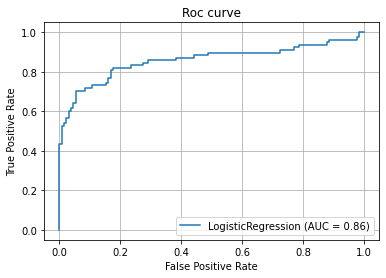

In [24]:
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_cols = list(set(df4.columns) - set(numeric_cols) - {'num       '})
cat_cols.sort()

scaler = StandardScaler()
scaler.fit(df4_train[numeric_cols])

def get_features_and_target_arrays(df, numeric_cols, cat_cols, scaler):
    X_numeric_scaled = scaler.transform(df[numeric_cols])
    X_categorical = df[cat_cols].to_numpy()
    X = np.hstack((X_categorical, X_numeric_scaled))
    y = df['num       ']
    return X, y

X, y = get_features_and_target_arrays(df4_train, numeric_cols, cat_cols, scaler)
clf = linear_model.LogisticRegression(penalty='none').fit(X, y)

X_test4, y_test4 = get_features_and_target_arrays(df4_test, numeric_cols, cat_cols, scaler)
metrics.plot_roc_curve(clf, X_test4, y_test4)
plt.grid(True)
plt.title('Roc curve')

Text(0.5, 1.0, 'Precission recall curve')

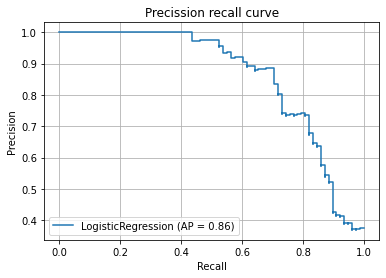

In [25]:
metrics.plot_precision_recall_curve(clf, X_test4, y_test4)
plt.grid(True)
plt.title('Precission recall curve')

In [26]:
test_prob4 = clf.predict_proba(X_test4)[:, 1]
test_pred4 = clf.predict(X_test4)

In [27]:
# Metryki ewaluacji wyniku znalezione w dokumentacji (https://scikit-learn.org/stable/modules/model_evaluation)
print('Log loss = {:.5f}'.format(metrics.log_loss(y_test4, test_prob4)))
print('AUC = {:.5f}'.format(metrics.roc_auc_score(y_test4, test_prob4)))
print('Average Precision = {:.5f}'.format(metrics.average_precision_score(y_test4, test_prob4)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(metrics.accuracy_score(y_test4, test_pred4)))
print('Precision = {:.5f}'.format(metrics.precision_score(y_test4, test_pred4)))
print('Recall = {:.5f}'.format(metrics.recall_score(y_test4, test_pred4)))
print('F1 score = {:.5f}'.format(metrics.f1_score(y_test4, test_pred4)))

print('\nClassification Report')
print(metrics.classification_report(y_test4, test_pred4))

Log loss = 0.64311
AUC = 0.85829
Average Precision = 0.86015

Using 0.5 as threshold:
Accuracy = 0.82297
Precision = 0.91837
Recall = 0.57692
F1 score = 0.70866

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       131
           1       0.92      0.58      0.71        78

    accuracy                           0.82       209
   macro avg       0.86      0.77      0.79       209
weighted avg       0.84      0.82      0.81       209



In [28]:
coefficients = np.hstack((clf.intercept_, clf.coef_[0]))
pd.DataFrame(data={'variable': ['intercept'] + cat_cols + numeric_cols, 'coefficient': coefficients})

,variable,coefficient
0,intercept,-16.748372
1,cp_2,14.108772
2,cp_3,14.048337
3,cp_4,15.178087
4,exang,1.684843
5,fbs,0.000000
6,restecg_1.0,-0.867705
7,restecg_2.0,0.000000
8,sex,0.869788
9,age,-0.554903


In [29]:
pd.DataFrame(data={'variable': numeric_cols, 'unit': np.sqrt(scaler.var_)})

,variable,unit
0,age,7.507787
1,trestbps,22.441410
2,chol,64.755009
3,thalach,25.311404
4,oldpeak,1.062366
